In [1]:
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# For interactivity
import ipywidgets
from ipywidgets import interact

In [2]:
# lets read the data set

data = pd.read_csv('Crop_recommendation.csv')

# lets check the shape of the dataset
print("The shape of the Dataset :", data.shape)

The shape of the Dataset : (2200, 8)


In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# let check if there is any missing value in the data set

data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# lets see different crop present in the dataset
data['label'].value_counts()

papaya         100
orange         100
blackgram      100
apple          100
mungbean       100
pigeonpeas     100
coconut        100
grapes         100
cotton         100
muskmelon      100
chickpea       100
rice           100
pomegranate    100
banana         100
coffee         100
mango          100
jute           100
lentil         100
kidneybeans    100
mothbeans      100
watermelon     100
maize          100
Name: label, dtype: int64

## Descriptive Statistics



In [6]:
# lets check the average ratio of nitrogen

print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorus in the soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil : {0:.2f}".format(data['K'].mean()))
print("Average Temperature in Celcius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average pH value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorus in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Temperature in Celcius : 25.62
Average Relative Humidity in % : 71.48
Average pH value of the soil : 6.47
Average Rainfall in mm : 103.46


In [7]:
# Lets check the summary for each crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    cols = list(data.columns)
    cols.remove('label')
    for col in cols:
        print('-'*45)
        print('Statistics for ', col)
        print('Minimum {} required : {}'.format(col, x[col].min()))
        print('Minimum {} required : {}'.format(col, x[col].mean()))
        print('Minimum {} required : {}'.format(col, x[col].max()))

interactive(children=(Dropdown(description='crops', options=('papaya', 'orange', 'blackgram', 'apple', 'mungbe…

In [8]:
# Let check the average Requirement for each crop with average conditions

cols = list(data.columns)
cols.remove('label')
@interact
def compare(condition = cols):
    print('-'*65)
    print('Average Value for ', condition, 'is {0:.2f}'.format(data[condition].mean()))
    print('-'*65)
    crops = list(data['label'].unique())
    for crop in crops:
        print('{} {}'.format(crop, data[data['label'] == crop][condition].mean()))

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

In [9]:
# Let us check crop that requie more than or less than the average 

cols = list(data.columns)
cols.remove('label')
@interact
def compare(condition = cols):
    print('Crop which require more than average {} \n'.format(condition))
    print(data[data[condition] > data[condition].mean()]['label'].unique())
    print('-'*65)
    print(data[data[condition] <= data[condition].mean()]['label'].unique())


interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

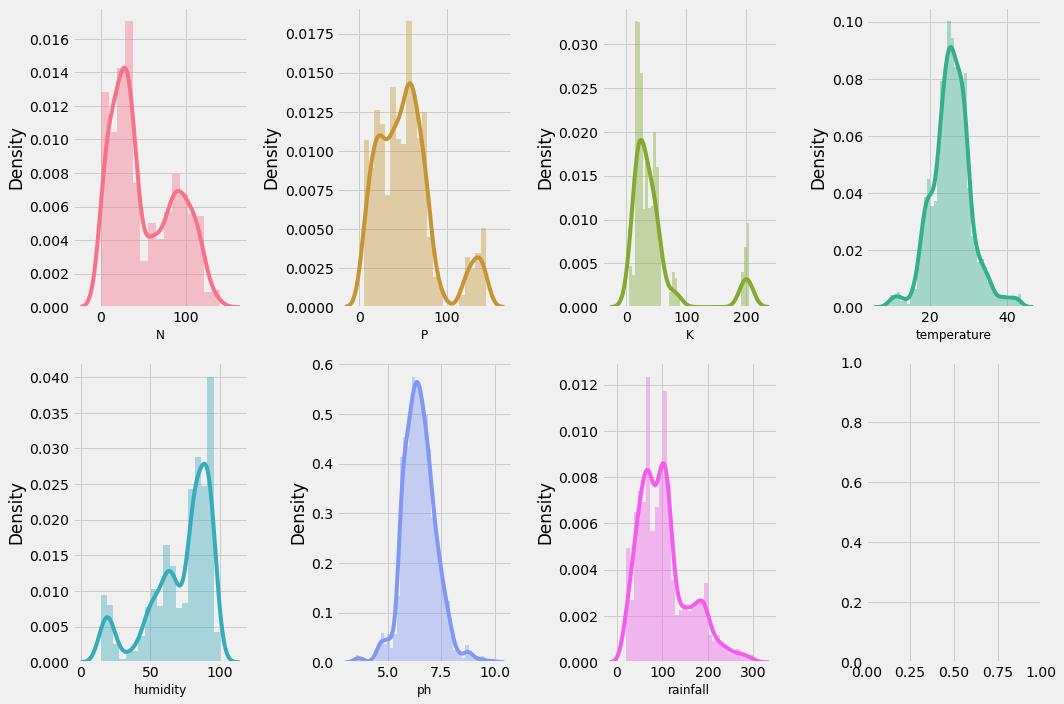

In [10]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns

filterwarnings('ignore')

cols = list(data.columns)
cols.remove('label')

# Define subplot parameters
rows = 2
cols_per_row = 4

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 10))

# Define a list of colors for each subplot
colors = sns.color_palette("husl", len(cols))

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(data[col], ax=ax, color=color)
    ax.set_xlabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Clustering Similar Crops

In [17]:
# Import warning library to avoid warnings
import warnings

warnings.filterwarnings('ignore')

# let select all the column  from the data
#x = data.loc[: ['N', 'P', 'K', 'temperature', 
#                 'humidity','ph', 'rainfall']].values

x= data.drop('label', axis=1)
# lets check the shape
print(x.shape)

# let convert the data into a dataframe
#x_data = pd.DataFrame(x)
#x_data.head()

x.head()

(2200, 7)


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


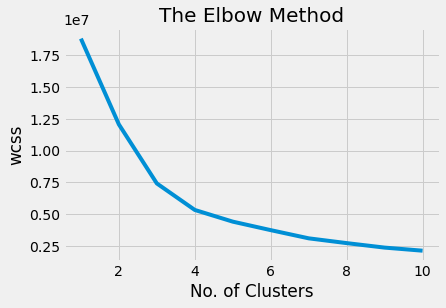

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init= 'k-means++',
                max_iter= 300,
                n_init=10, 
                random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [19]:
# Performing Kmeans Clustering Analysis

km = KMeans(n_clusters=6, init='k-means++', 
            max_iter=300, n_init=100, random_state=0)
y_means = km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis= 1)
z = z.rename(columns = {0: 'cluster'})

In [27]:
# let check the cluster of each crops

print('Let check the result')
for i in range(0,4):
    if i == 0:
        print(' Crops in {} Cluster'.format(i), 
              z[z['cluster'] == 0]['label'].unique())
        print('-' *65)
        
    elif i == 1:
        print(' Crops in {} Cluster'.format(i), 
              z[z['cluster'] == 1]['label'].unique())
        print('-' *65)
    elif i == 2:
        print(' Crops in {} Cluster'.format(i), 
              z[z['cluster'] == 2]['label'].unique())
        print('-' *65)
        
    elif i == 3:
        print(' Crops in {} Cluster'.format(i), 
              z[z['cluster'] == 3]['label'].unique())
        print('-' *65)
    elif i == 4:
        print(' Crops in {} Cluster'.format(i), 
              z[z['cluster'] == 4]['label'].unique())
        print('-' *65)
    else:
        pass

Let check the result
 Crops in 0 Cluster ['grapes' 'apple']
-----------------------------------------------------------------
 Crops in 1 Cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
-----------------------------------------------------------------
 Crops in 2 Cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'mango' 'papaya']
-----------------------------------------------------------------
 Crops in 3 Cluster ['maize' 'banana' 'papaya' 'cotton' 'jute' 'coffee']
-----------------------------------------------------------------


In [31]:
# Hard Clustering

print('Result for Hard Clustering\n')

for i in range(0,4):
    counts = z[z['cluster'] == i]['label'].value_counts()
    d = z.loc[z['label'].isin(counts.index[counts >= 50])]
    d = d['label'].value_counts()
    print('Crops in cluster {}:'.format(i), list(d.index))
    print('-' *65)

Result for Hard Clustering

Crops in cluster 0: ['apple', 'grapes']
-----------------------------------------------------------------
Crops in cluster 1: ['rice', 'jute', 'coffee']
-----------------------------------------------------------------
Crops in cluster 2: ['mothbeans', 'mungbean', 'kidneybeans', 'lentil', 'blackgram', 'chickpea']
-----------------------------------------------------------------
Crops in cluster 3: ['cotton', 'banana', 'maize']
-----------------------------------------------------------------


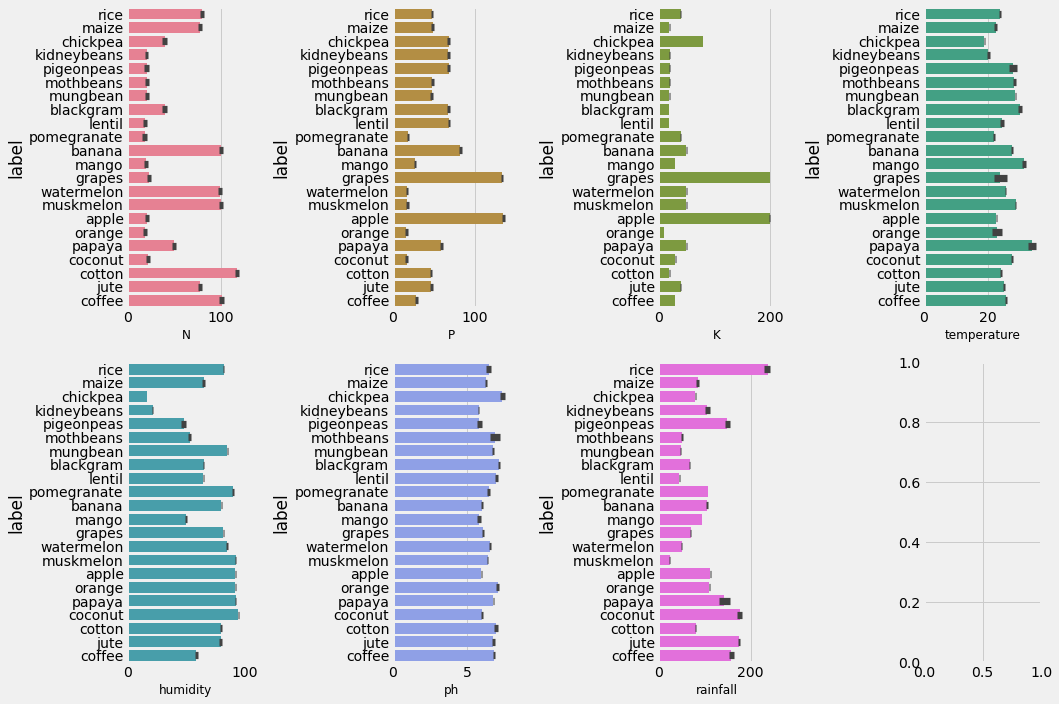

In [36]:
# Visualizing Hidden Pattern

from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns

filterwarnings('ignore')

cols = list(data.columns)
cols.remove('label')

# Define subplot parameters
rows = 2
cols_per_row = 4

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 10))

# Define a list of colors for each subplot
colors = sns.color_palette("husl", len(cols))

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.barplot(data[col],data['label'], ax=ax, color=color)
    ax.set_xlabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
#plt.suptitle('Visualizing the impact of Different conditions')
plt.show()


In [37]:
# let split the target column attrition from the dataset

y= data['label']
x= data.drop(['label'], axis=1)


# lets check the shape of the dataset
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (2200, 7)
Shape of y : (2200,)


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


print('The shape of xtrain is :', x_train.shape)
print('The shape of xtest is :', x_test.shape)
print('The shape of ytrain is :', y_train.shape)
print('The shape of ytest is :', y_test.shape)

The shape of xtrain is : (1760, 7)
The shape of xtest is : (440, 7)
The shape of ytrain is : (1760,)
The shape of ytest is : (440,)


In [39]:
# let create a predictive model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)

print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.82      0.86      0.84        21
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.89      0.94        18
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.84      0.91        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.89      0.94      0.91        17
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.88      0.90        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

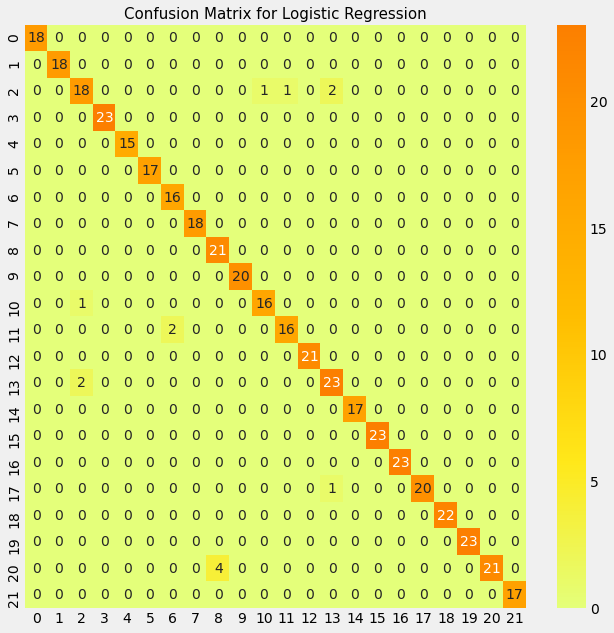

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.82      0.86      0.84        21
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.89      0.94        18
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.84      0.91        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.89      0.94      0.91        17
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.88      0.90        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, cmap= 'Wistia')

plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)

plt.show()

cr = classification_report(y_pred, y_test)

print(cr)

In [41]:
# Lets check the head of the data set
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [47]:
import numpy as np
prediction = model.predict((np.array([[90, 40,
                                      40, 20,
                                      80, 7,
                                      200]])))

print('The suggested crop for given Climatic Condition is:', prediction[0])

The suggested crop for given Climatic Condition is: rice


In [48]:
import numpy as np
prediction = model.predict((np.array([[20, 30,
                                      10, 15,
                                      90, 7.5,
                                      100]])))

print('The suggested crop for given Climatic Condition is:', prediction[0])

The suggested crop for given Climatic Condition is: orange
